### Loading Dependencies

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

#metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve

### Loading data 

In [2]:
data = pd.read_csv('./data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data['Outcome'].value_counts() # 0 - No diabetes 1 - diabetes

0    500
1    268
Name: Outcome, dtype: int64

###  Bar chart

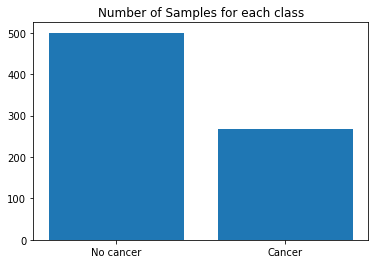

In [24]:
y_axis = list(data['Outcome'].value_counts())
classes = [0, 1]
plt.bar(classes, y_axis, align='center', alpha=1)
plt.xticks(classes,['No cancer','Cancer'])
plt.title('Number of Samples for each class')

plt.show()

###  pairplots

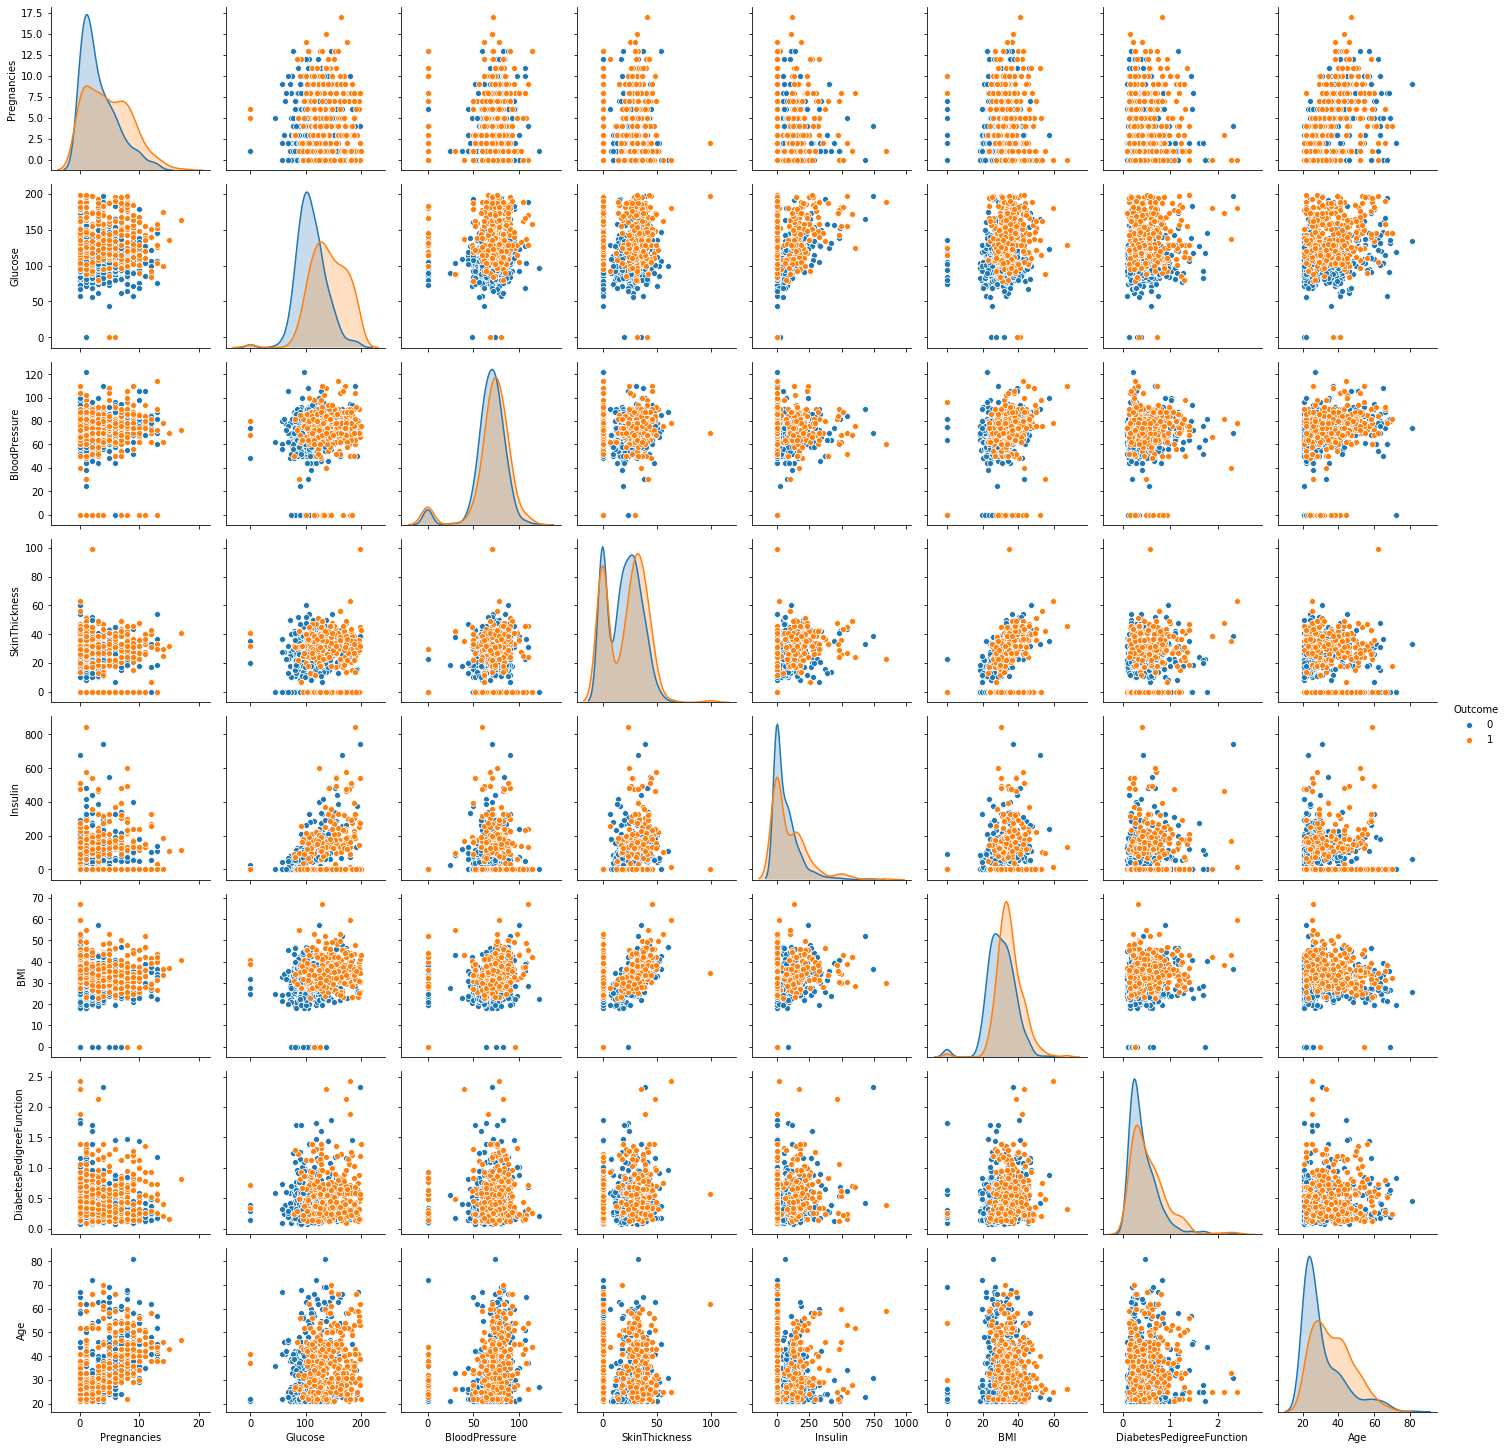

In [25]:
sns.pairplot(data=data,hue='Outcome',diag_kind='kde')
plt.show()

# PAir grid
# g = sns.PairGrid(data=data, hue = 'Outcome')
# g = g.map(plt.scatter)
# plt.show()

### Observations

1. If we observe pair plots, the data is well distributed. 
2. No way we can seperate them using any of the one feature

###  Normalization of Data

In [33]:
def normalize(data):
    mean = data.mean()
    std = data.std()
    data = (data - mean)/std
    
    return data

req_cols = list(data.columns)[:-1]

for col in req_cols:
    data[col] = normalize(data[col])
    
data.head()

In [39]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,0
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,0
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1


###  Train Test Split

In [42]:
X_data = data[req_cols]
y_data = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.2, random_state=42,stratify = y_data)

In [54]:
counts = list(y_train.value_counts())
print('Num of Samples belong to Training')
print(f'Class 0 : {counts[0]}\nClass 1 : {counts[1]}')
print('-'*50)
counts = list(y_test.value_counts())
print('Num of Samples belong to Testing')
print(f'Class 0 : {counts[0]}\nClass 1 : {counts[1]}')

Num of Samples belong to Training
Class 0 : 400
Class 1 : 214
--------------------------------------------------
Num of Samples belong to Testing
Class 0 : 100
Class 1 : 54


###  Classifier 1 : K Nearest Neighbor

In [58]:
from sklearn.neighbors import KNeighborsClassifier


train_accuracies = []
test_accuracies = []
neighbors = range(1,11) # k = 1 to 10

for neigh in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neigh, algorithm='ball_tree')
    knn.fit(X_train, y_train)
    
    train_acc = knn.score(X_train, y_train)
    test_acc = knn.score(X_test, y_test)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)


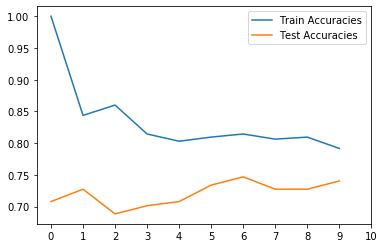

In [66]:
plt.plot(train_accuracies, label = 'Train Accuracies')
plt.plot(test_accuracies, label = 'Test Accuracies')
plt.legend(loc = 'upper right')
plt.xticks(range(0,11))
plt.show()

In [71]:
ind = np.argmax(test_accuracies)
print('Num of Neighbors : ',ind)
print(f'Best Testing Accuracy : {test_accuracies[ind]}')

print(f'Training Accuracy at index {ind} is :  {train_accuracies[ind]}')


Num of Neighbors :  6
Best Testing Accuracy : 0.7467532467532467
Training Accuracy at index 6 is :  0.8143322475570033


###  KNN at neighbors = 6

In [72]:
knn = KNeighborsClassifier(n_neighbors= 6 , algorithm='ball_tree')
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

Text(0.5, 1.0, 'Roc Curve')

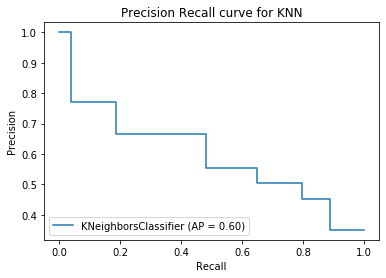

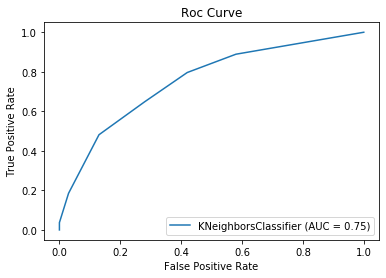

In [77]:


disp = plot_precision_recall_curve(knn, X_test, y_test)
disp.ax_.set_title('Precision Recall curve for KNN')

disp = plot_roc_curve(knn,X_test, y_test)
disp.ax_.set_title('Roc Curve for KNN')

### Classifier 2 : Logistic regression

In [101]:
from sklearn.linear_model import LogisticRegression

C_val = [0.001,0.01, 0.1, 1, 10, 100, 1000]

train_accuracies = []
test_accuracies = []
for k in C_val:
    logreg = LogisticRegression(C = k)
    logreg.fit(X_train, y_train)
    
    train_acc = logreg.score(X_train, y_train)
    test_acc = logreg.score(X_test, y_test)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    

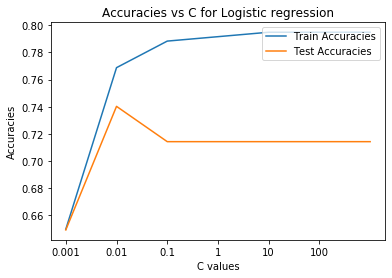

In [102]:
plt.plot(train_accuracies, label = 'Train Accuracies')
plt.plot(test_accuracies, label = 'Test Accuracies')
plt.legend(loc = 'upper right')
plt.title('Accuracies vs C for Logistic regression')
plt.xticks(range(0,6),C_val)
plt.xlabel('C values')
plt.ylabel('Accuracies')
plt.show()

In [107]:
ind = np.argmax(test_accuracies)
print('Best Value of C  : ',C_val[ind])
print(f'Best Testing Accuracy : {test_accuracies[ind]}')

print(f'Training Accuracy at C {C_val[ind]} is :  {train_accuracies[ind]}')


Best Value of C  :  0.01
Best Testing Accuracy : 0.7402597402597403
Training Accuracy at C 0.01 is :  0.7687296416938111


In [108]:
logreg = LogisticRegression(C = 0.01)

logreg.fit(X_train, y_train)

train_acc = logreg.score(X_train, y_train)
test_acc = logreg.score(X_test, y_test)

print(f'Train accuracy : {train_acc}')
print(f'Test accuracy : {test_acc}')

Train accuracy : 0.7687296416938111
Test accuracy : 0.7402597402597403


Text(0.5, 1.0, 'Roc Curve for Logistic regression')

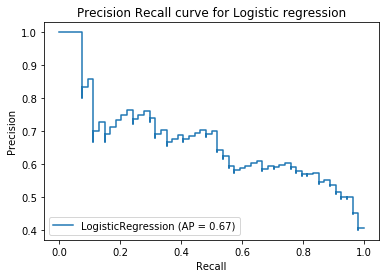

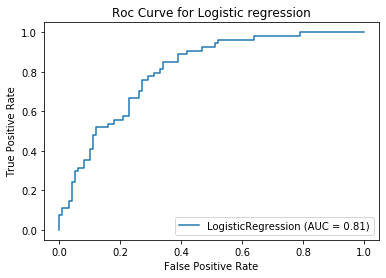

In [109]:

disp = plot_precision_recall_curve(logreg, X_test, y_test)
disp.ax_.set_title('Precision Recall curve for Logistic regression')

disp = plot_roc_curve(logreg,X_test, y_test)
disp.ax_.set_title('Roc Curve for Logistic regression')

### Observations :
1. Compared to KNN We got less training and Test accuracies in case of Logistic Regression
2. But, in case of Logistic Regression we have achieved better Average Precision and AUC score which are more important than accuracies

### Classifier 3 : Decision tree Classifier

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#'max_features' : [0,5,10,15,20,25]
splits = np.linspace(0.1, 1.0, 10, endpoint=True)
tree_parameters = {
    'max_depth' : [4,5,6,7,8,9,10,11,12,15,20,30,40,50],
    'criterion' :['gini', 'entropy'],
    'min_samples_split' : splits,
    
}

clf = GridSearchCV(DecisionTreeClassifier(), tree_parameters, cv=5)



In [118]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [121]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_split': 0.30000000000000004}

In [131]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=4, min_samples_split = 0.3)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [134]:

train_acc = dt_classifier.score(X_train, y_train)
test_acc = dt_classifier.score(X_test, y_test)

print(f'Train accuracy : {train_acc}')
print(f'Test accuracy : {test_acc}')

Train accuracy : 0.760586319218241
Test accuracy : 0.6948051948051948


Text(0.5, 1.0, 'Roc Curve for Decision tree Classifier')

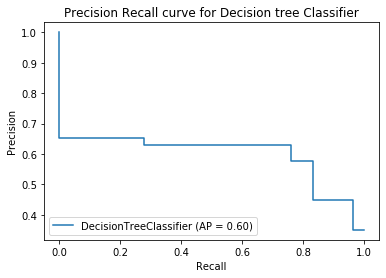

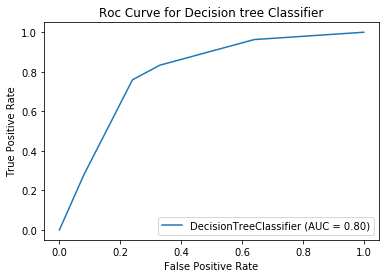

In [135]:

disp = plot_precision_recall_curve(dt_classifier, X_test, y_test)
disp.ax_.set_title('Precision Recall curve for Decision tree Classifier')

disp = plot_roc_curve(dt_classifier,X_test, y_test)
disp.ax_.set_title('Roc Curve for Decision tree Classifier')

### Classifier : 4 Random Forest Classifier

In [137]:
from sklearn.ensemble import RandomForestClassifier

max_depth = [1,2,3,4,5,6,7,8,9,10]

train_accuracies = []
test_accuracies = []

for depth in max_depth:
    rf = RandomForestClassifier(n_estimators=100, random_state=0,max_depth = depth)
    rf.fit(X_train, y_train)
    train_acc = rf.score(X_train, y_train)
    test_acc = rf.score(X_test, y_test)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    


In [138]:
ind = np.argmax(test_accuracies)
print('Best Value of max_depth  : ',max_depth[ind])
print(f'Best Testing Accuracy : {test_accuracies[ind]}')

print(f'Training Accuracy at max_depth {max_depth[ind]} is :  {train_accuracies[ind]}')


Best Value of max_depth  :  6
Best Testing Accuracy : 0.7597402597402597
Training Accuracy at max_depth 6 is :  0.8925081433224755


In [144]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0,max_depth = 6)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Text(0.5, 1.0, 'Roc Curve for Random Forests Classifier')

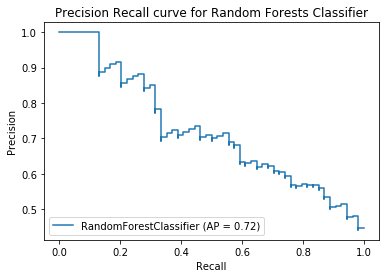

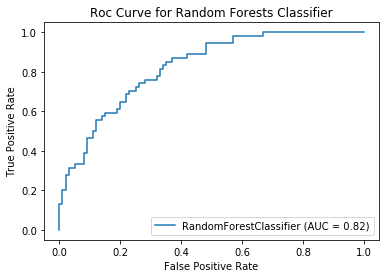

In [145]:

disp = plot_precision_recall_curve(rf_clf, X_test, y_test)
disp.ax_.set_title('Precision Recall curve for Random Forests Classifier')

disp = plot_roc_curve(rf_clf,X_test, y_test)
disp.ax_.set_title('Roc Curve for Random Forests Classifier')

### Observations
1. We got better AP and AUC score compared to any other Classifier
2. It even crossed Logistic Regression and single decision tree classifier
2. The results are : AP = 0.72 and AUC = 0.82

### Classifier 5 : Support Vector Machines

In [146]:
from sklearn.svm import SVC

C_val = [0.01, 0.1, 1, 10, 100, 1000]

train_accuracies = []
test_accuracies = []
for c in C_val:
    svc = SVC(C=c)
    
    svc.fit(X_train, y_train)
    train_acc = svc.score(X_train, y_train)
    test_acc = svc.score(X_test, y_test)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    

In [147]:
ind = np.argmax(test_accuracies)
print('Best Value of C  : ',C_val[ind])
print(f'Best Testing Accuracy : {test_accuracies[ind]}')

print(f'Training Accuracy at max_depth {C_val[ind]} is :  {train_accuracies[ind]}')


Best Value of C  :  1
Best Testing Accuracy : 0.7467532467532467
Training Accuracy at max_depth 1 is :  0.8355048859934854


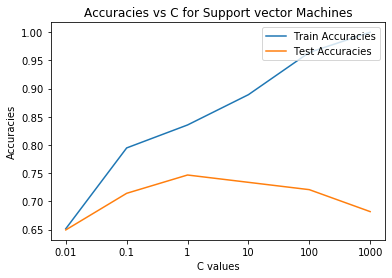

In [148]:
plt.plot(train_accuracies, label = 'Train Accuracies')
plt.plot(test_accuracies, label = 'Test Accuracies')
plt.legend(loc = 'upper right')
plt.title('Accuracies vs C for Support vector Machines')
plt.xticks(range(0,6),C_val)
plt.xlabel('C values')
plt.ylabel('Accuracies')
plt.show()

Text(0.5, 1.0, 'Roc Curve for Support vector machines')

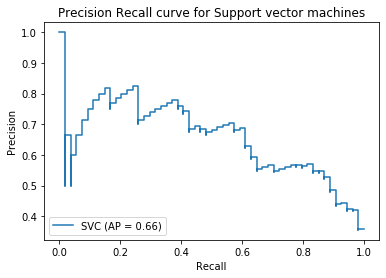

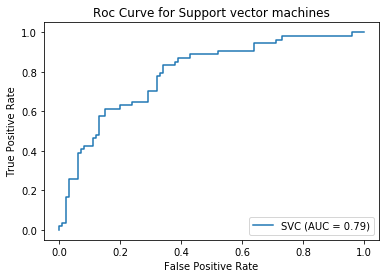

In [150]:
best_svc = SVC(C=1)
best_svc.fit(X_train, y_train)


disp = plot_precision_recall_curve(best_svc, X_test, y_test)
disp.ax_.set_title('Precision Recall curve for Support vector machines')

disp = plot_roc_curve(best_svc,X_test, y_test)
disp.ax_.set_title('Roc Curve for Support vector machines')

###  Ensemble of All Classifiers

In [152]:
knn_ypred = knn.predict(X_test)
logreg_ypred = logreg.predict(X_test)

dt_clf_ypred = dt_classifier.predict(X_test)
rf_clf_ypred = rf_clf.predict(X_test)

svc_ypred = best_svc.predict(X_test)

In [154]:
def get_labels(knn_ypred, logreg_ypred, dt_clf_ypred, rf_clf_ypred, svc_ypred):
    preds = []
    
    for i in range(len(knn_ypred)):
        array = [knn_ypred[i], logreg_ypred[i], dt_clf_ypred[i], rf_clf_ypred[i], svc_ypred[i]]
        label = max(array, key = array.count)
        preds.append(label)
        
    return preds


In [155]:
ensemble_pred = get_labels(knn_ypred, logreg_ypred, dt_clf_ypred, rf_clf_ypred, svc_ypred)

In [157]:
from sklearn.metrics import accuracy_score

ensemble_acc = accuracy_score(y_test, ensemble_pred)
print('Accuracy of Ensemble Classifier : ', ensemble_acc)

Accuracy of Ensemble Classifier :  0.7597402597402597


In [158]:
from sklearn.metrics import average_precision_score
ensemble_ap = average_precision_score(y_test, ensemble_pred)

print('Average Precision of Ensemble Classifier : ', ensemble_ap)

Average Precision of Ensemble Classifier :  0.5434410550689621


In [159]:
from sklearn.metrics import roc_auc_score

ensemble_auc = roc_auc_score(y_test, ensemble_pred)

print('AUC score of Ensemble Classifier : ', ensemble_auc)

AUC score of Ensemble Classifier :  0.7127777777777777
